In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# SVM

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## sensitive to outliers

(np.float64(0.0), np.float64(5.5), np.float64(0.0), np.float64(2.0))

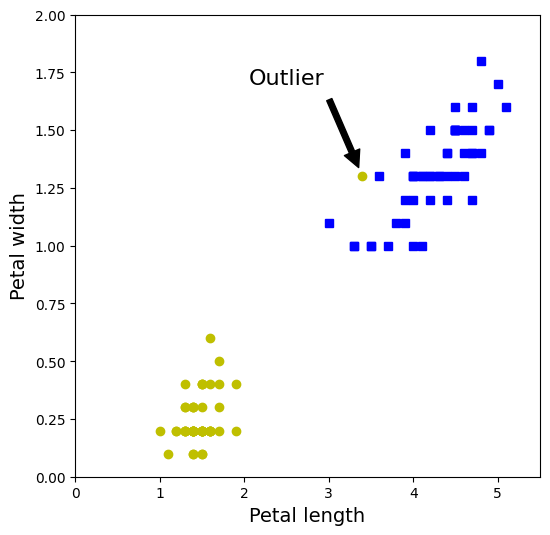

In [3]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(figsize=(6,6), sharey=True)

plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)



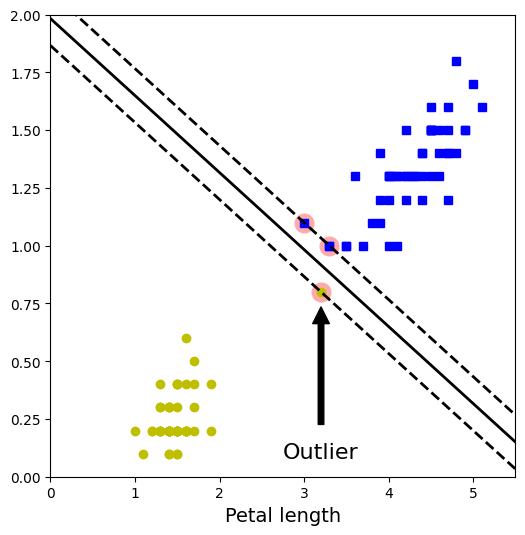

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(figsize=(6,6), sharey=True)

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

Implementation

In [6]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


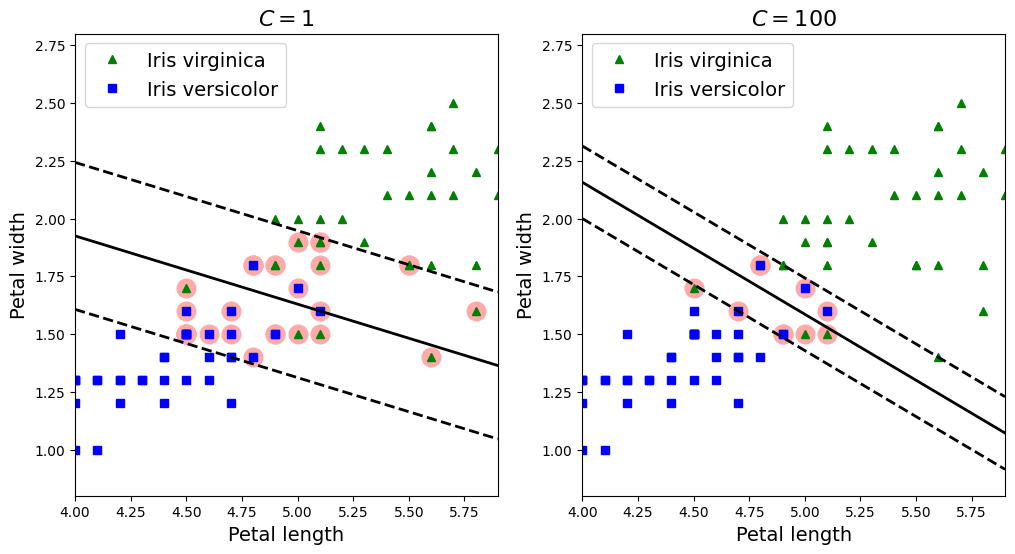

In [7]:
fig, subaxes = plt.subplots(1, 2, figsize=(12, 6))
scaler = StandardScaler()

for C_val, subplot in zip([1, 100], subaxes):
    svm_clf = LinearSVC(C=C_val, loss="hinge", random_state=42)
    scaled_svm_clf = Pipeline([("scaler", scaler),("linear_svc", svm_clf)])
    scaled_svm_clf.fit(X, y)
    # Convert to unscaled parameters
    b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
    w = svm_clf.coef_[0] / scaler.scale_
    svm_clf.intercept_ = np.array([b])
    svm_clf.coef_ = np.array([w])

    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
    svm_clf.support_vectors_ = X[support_vectors_idx]

    plt.sca(subplot)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
    plot_svc_decision_boundary(svm_clf, 4, 5.9)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

### Hinge Loss

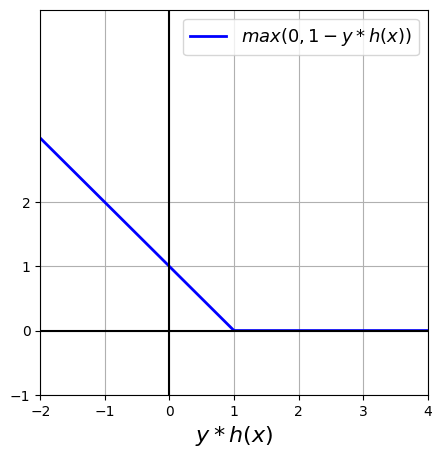

In [8]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,5))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - y*h(x))$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$y*h(x)$", fontsize=16)
plt.axis([-2, 4, -1, 5])
plt.legend(loc="upper right", fontsize=13)
plt.show()

## NonLinear SVM

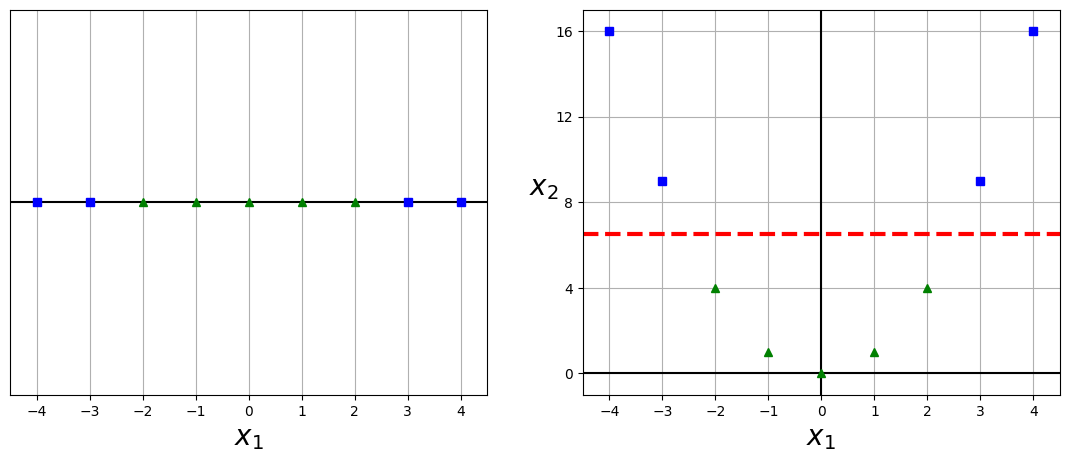

In [9]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

### Polynomial kernel

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

In [11]:
from sklearn.svm import SVC

poly_low_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_low_svm_clf.fit(X, y)

poly_high_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly_high_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

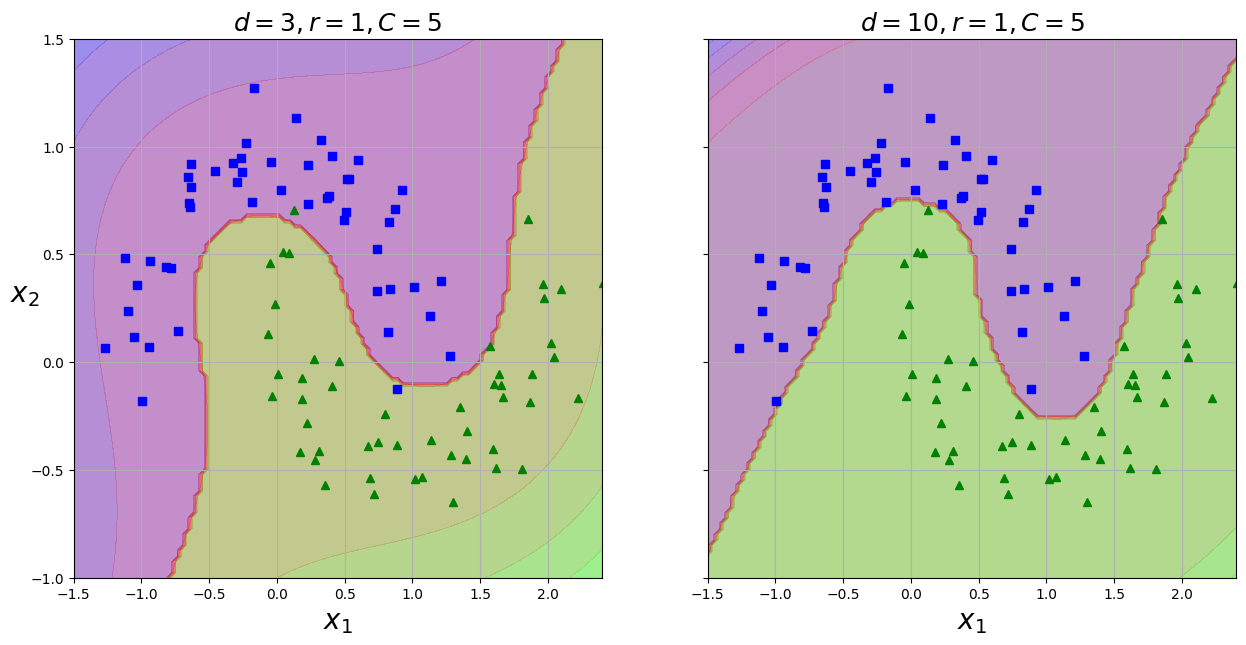

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_low_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly_high_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

coef0 tunning

In [13]:
poly1_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly1_svm_clf.fit(X, y)

poly2_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=4, C=5))
    ])
poly2_svm_clf.fit(X, y)

poly3_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=7, C=5))
    ])
poly3_svm_clf.fit(X, y)

poly4_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=10, C=5))
    ])
poly4_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=10, kernel='poly'))])

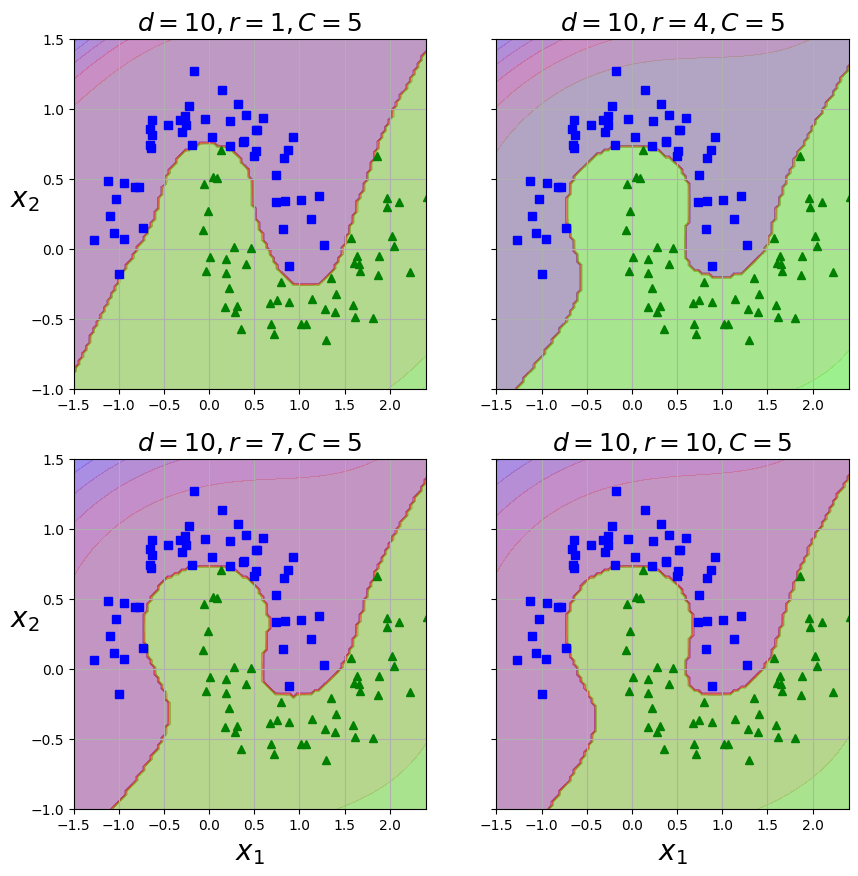

In [14]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(10, 10), sharey=True)

plt.sca(axes[0][0])
plot_predictions(poly1_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)
plt.xlabel("")

plt.sca(axes[0][1])
plot_predictions(poly2_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=4, C=5$", fontsize=18)
plt.ylabel("")
plt.xlabel("")

plt.sca(axes[1][0])
plot_predictions(poly3_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=7, C=5$", fontsize=18)

plt.sca(axes[1][1])
plot_predictions(poly4_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=10, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

### RBF Kernel

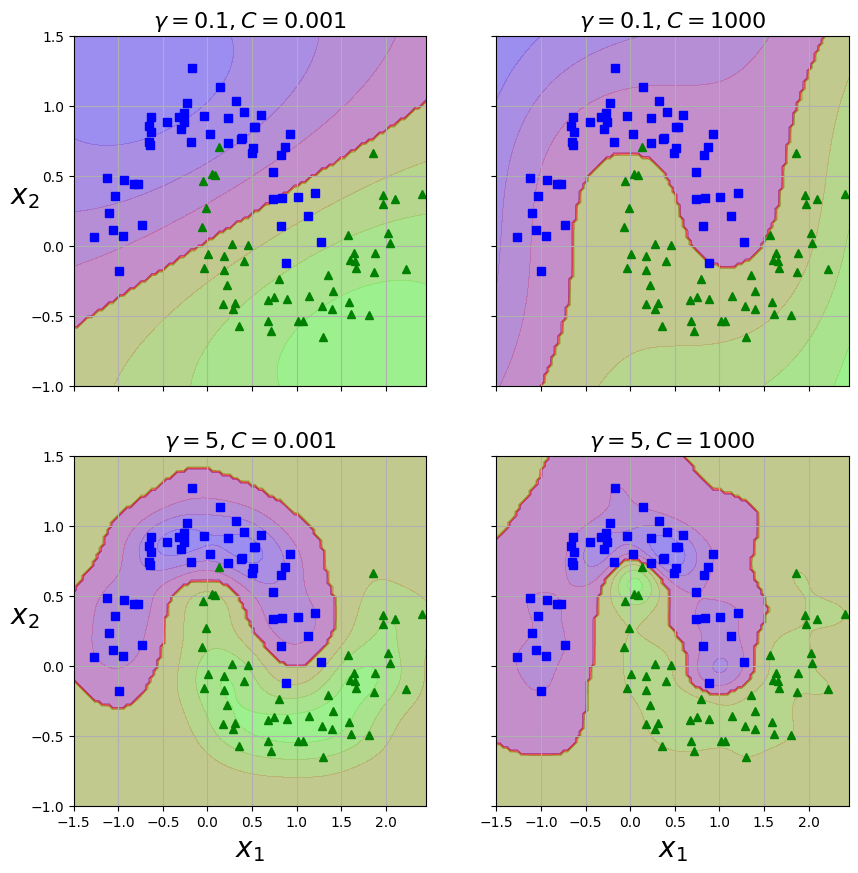

In [15]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# SVM Regression

In [16]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [17]:
from sklearn.svm import LinearSVR

In [18]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

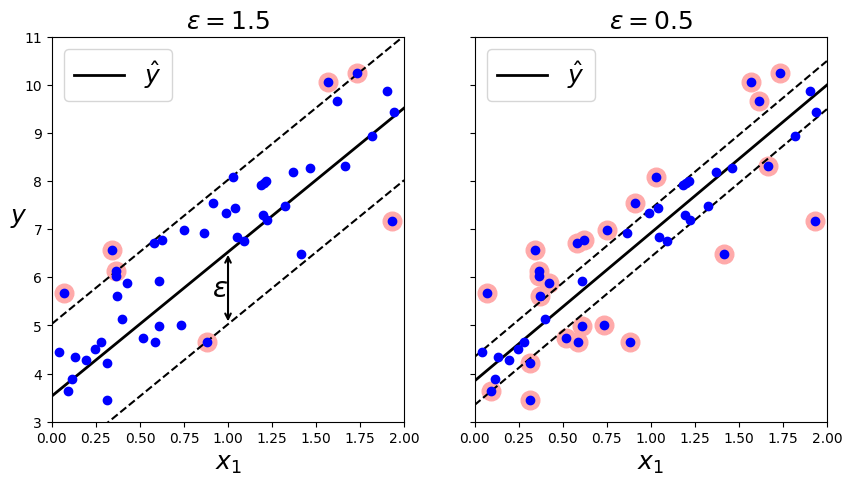

In [19]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

In [20]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [21]:
from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.15, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, epsilon=0.15, kernel='poly')

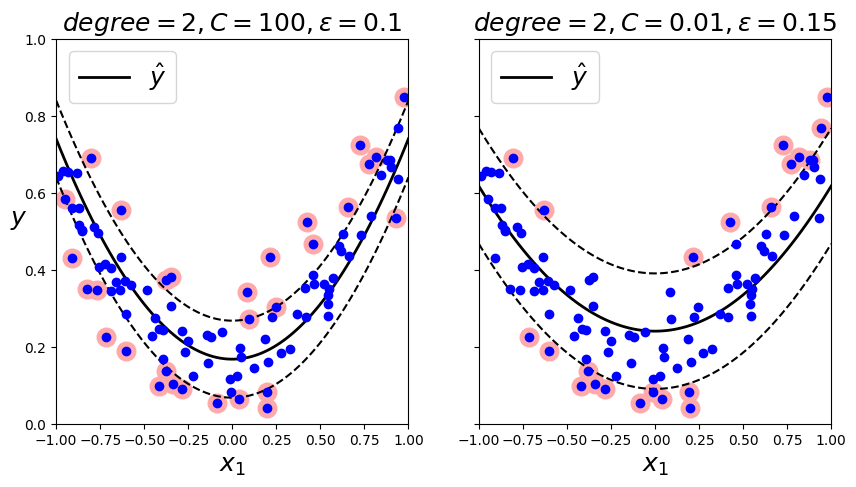

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

# K Nearest Neighbors

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# iris = datasets.load_iris()
# X = iris["data"][:, (2, 3)]  # petal length, petal width
# y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

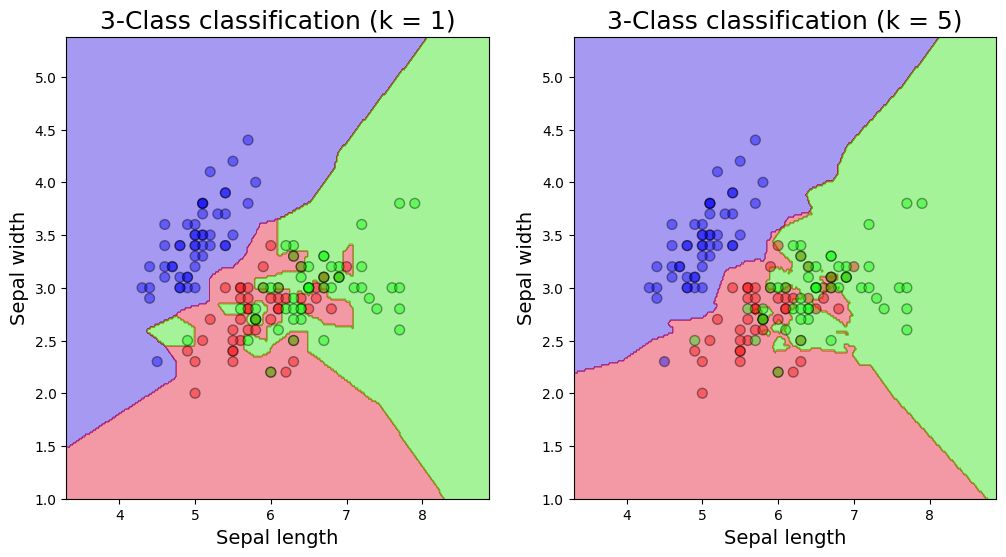

In [24]:
fig, subaxes = plt.subplots(1, 2, figsize=(12, 6))
scaler = StandardScaler()

for n_neighbors, subplot in zip([1, 5], subaxes):
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors)
    scaled_knn_clf = Pipeline([("scaler", scaler),("knn", knn_clf)])
    scaled_knn_clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = scaled_knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.sca(subplot)
    plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha = 0.4)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k', s=50, alpha = 0.4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors), fontsize=18)
    plt.xlabel("Sepal length", fontsize=14)
    plt.ylabel("Sepal width", fontsize=14)

plt.show()

KNN Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 42)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 97.71856271 197.96924566 218.37593196 139.12841147 161.94570513
  83.45006048 144.7581741  203.95105919 127.94266855 149.38684957
 206.85616957 123.81844068 214.1053431  141.4293915   83.45006048
 123.81844068 142.30240446 197.96924566  67.67311203 131.03111237
 143.7048434  142.30240446 218.37593196  67.47529297 218.37593196]
R-squared test score: 0.609


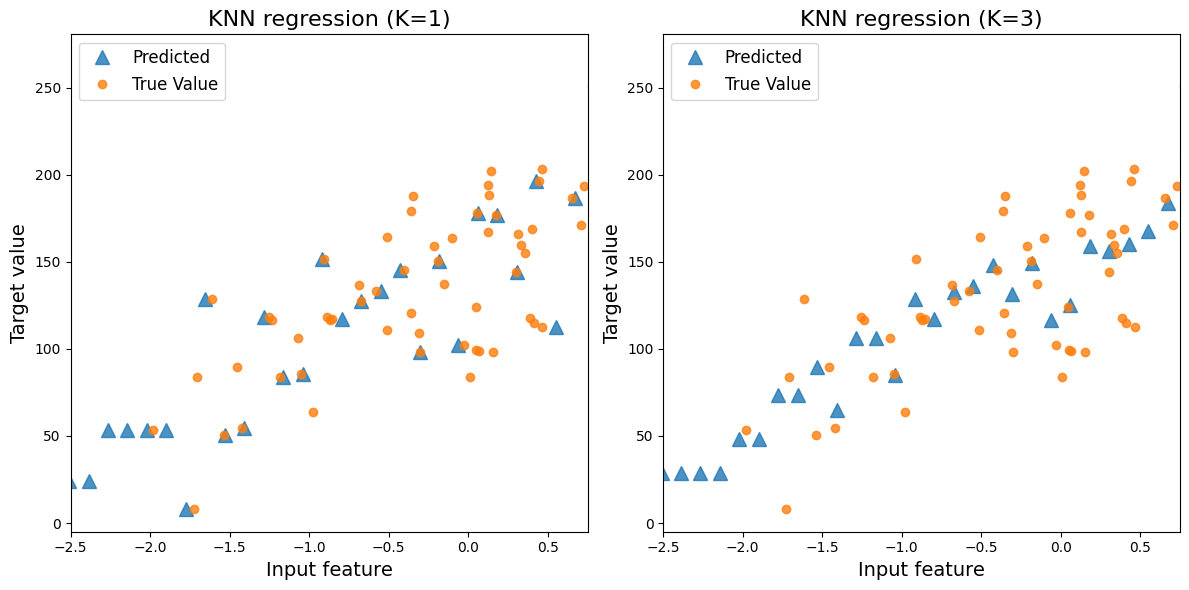

In [26]:
fig, subaxes = plt.subplots(1, 2, figsize=(12,6))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature', fontsize=14)
    thisaxis.set_ylabel('Target value', fontsize=14)
    thisaxis.set_title('KNN regression (K={})'.format(K), fontsize=16)
    thisaxis.legend(fontsize=12)
plt.tight_layout()


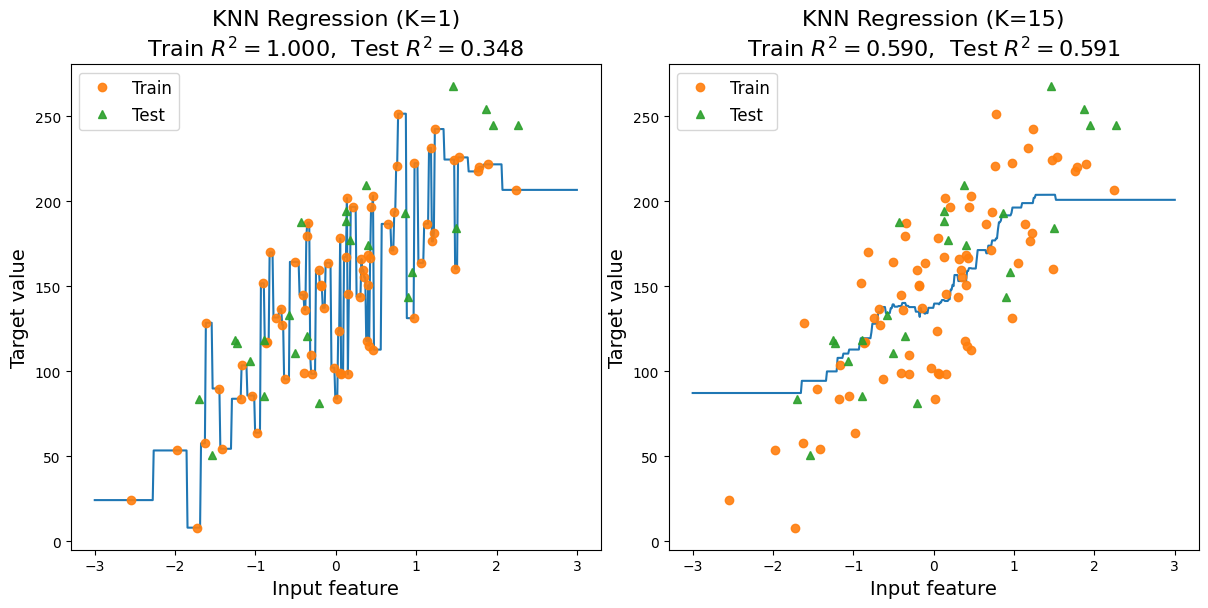

In [27]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(1, 2, figsize=(12,6))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 42)

for thisaxis, K in zip(subaxes, [1,  15]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature', fontsize=14)
    thisaxis.set_ylabel('Target value', fontsize=14)
    thisaxis.set_title('KNN Regression (K={})\nTrain $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'.format(K, train_score, test_score),
                      fontsize=16)
    thisaxis.legend(fontsize=12)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Feature Selection

In [28]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

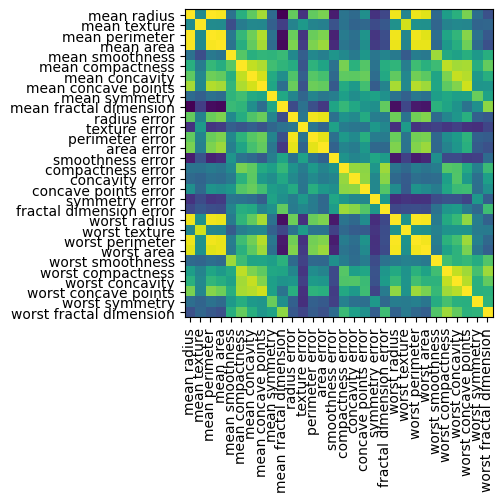

In [29]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

plt.figure(figsize=(4, 4), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), cancer_data.feature_names, rotation=90)
plt.yticks(range(X.shape[1]), cancer_data.feature_names)
plt.show()

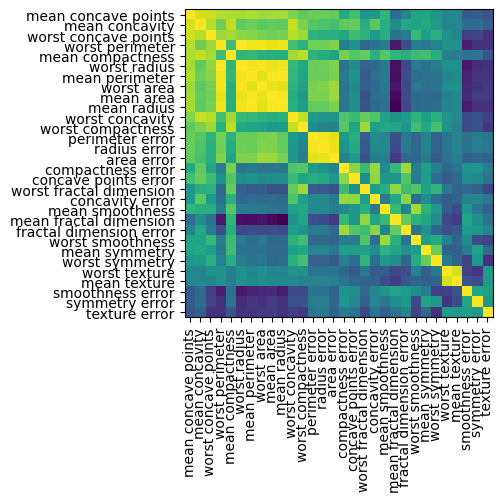

In [30]:
order = np.argsort(np.linalg.norm(cov,axis=1))[::-1]

plt.figure(figsize=(4, 4), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.xticks(range(X.shape[1]), cancer_data.feature_names[order], rotation=90)
plt.yticks(range(X.shape[1]), cancer_data.feature_names[order])
plt.show()

#### Univariate Statistics

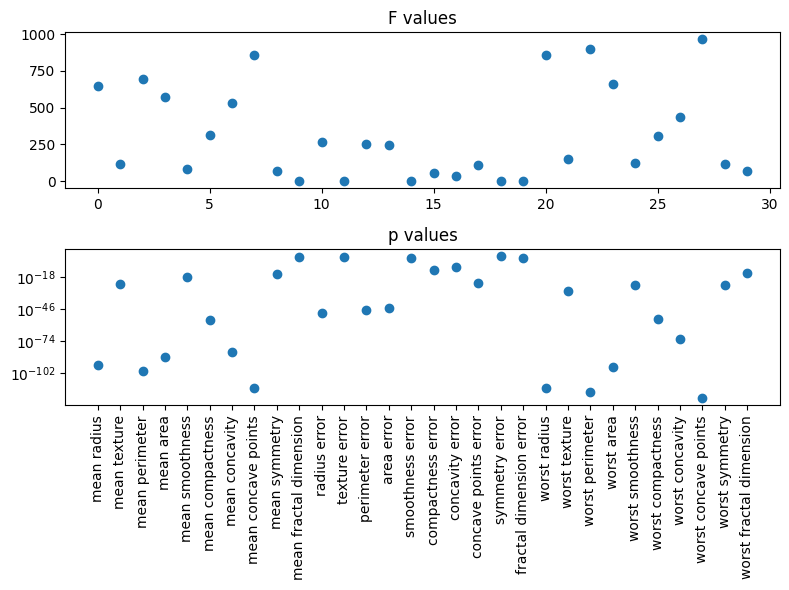

In [31]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X, y)

fig, ax = plt.subplots(2, 1, figsize=(8,6))
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(cancer_data.feature_names, rotation=90);
fig.tight_layout()

In [32]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr

all_features = Pipeline([('scalar', StandardScaler()), ('svm', SVC())])
select_2_features = Pipeline([('scalar', StandardScaler()),
                              ('f_select', SelectKBest(k=2, score_func=f_classif)),
                              ('svm', SVC())])

In [33]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(all_features, X_train, y_train, cv=10)))
print(np.mean(cross_val_score(select_2_features, X_train, y_train, cv=10)))

0.9790143964562569
0.9250830564784053


#### Model-based

In [34]:
svm_all = SVC(kernel='linear').fit(X_train_scaled, y_train)

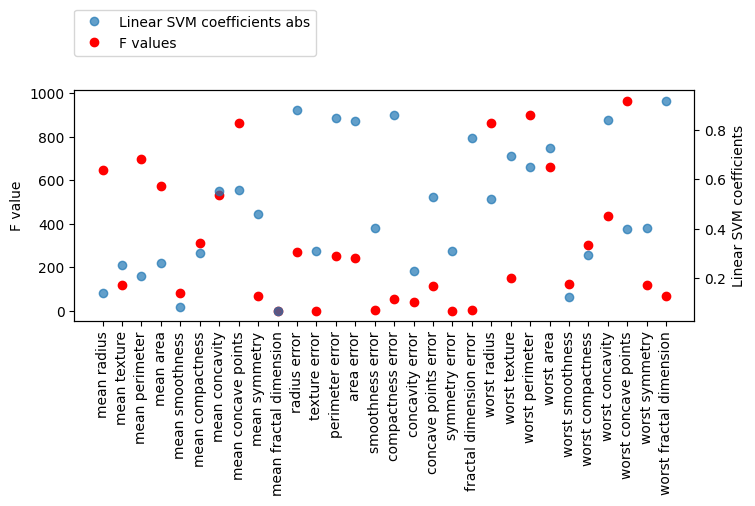

In [35]:
fig = plt.figure(figsize=(8, 3))
plt.xticks(range(X.shape[1]), cancer_data.feature_names, rotation= 90)
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("Linear SVM coefficients")
line_s, = ax2.plot(np.abs(svm_all.coef_[0]), 'o', alpha=.7)
plt.legend([line_s, line_f], ["Linear SVM coefficients abs", "F values"], loc=(0,1.15))
plt.show()

In [36]:
from sklearn.feature_selection import SelectFromModel
select_svm = SelectFromModel(SVC(kernel='linear'))
select_svm.fit(X_train, y_train)
select_svm.transform(X_train).shape, X_train.shape

((426, 9), (426, 30))

In [37]:
select_svm_features = Pipeline([('scalar', StandardScaler()),
                              ('select_svm', select_svm),
                              ('svm', SVC())])

In [38]:
print(np.mean(cross_val_score(all_features, X_train, y_train, cv=10)))
print(np.mean(cross_val_score(select_svm_features, X_train, y_train, cv=10)))

0.9790143964562569
0.9743078626799557


In [39]:
from sklearn.feature_selection import RFE

# create ranking among all features by selecting only one feature
rfe = RFE(SVC(kernel='linear'), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

array([27, 26, 17, 20, 29, 19, 18, 14, 10, 30,  4, 12, 11,  2, 13,  5, 25,
       22, 23, 15,  9,  7,  1,  8, 28, 24,  6,  3, 21, 16])

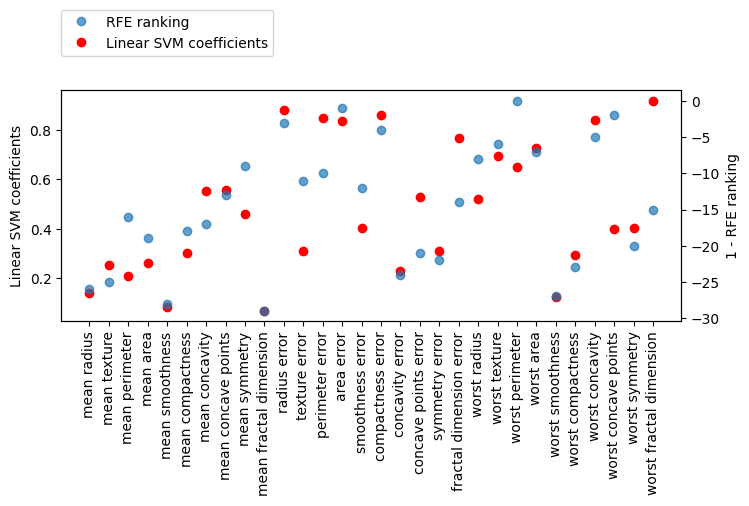

In [40]:
fig = plt.figure(figsize=(8, 3))
plt.xticks(range(X.shape[1]), cancer_data.feature_names, rotation=90)
line_f, = plt.plot(np.abs(svm_all.coef_[0]), 'o', c='r')
plt.ylabel("Linear SVM coefficients")
ax2 = plt.twinx()
ax2.set_ylabel("1 - RFE ranking")
line_s, = ax2.plot(1 - rfe.ranking_, 'o', alpha=.7)
plt.legend([line_s, line_f], ["RFE ranking", "Linear SVM coefficients"], loc=(0, 1.15))
plt.show()

In [41]:
from sklearn.feature_selection import RFECV

rfe = RFECV(SVC(kernel='linear'), cv=10)
rfe.fit(X_train_scaled, y_train)
print(rfe.support_)
print(cancer_data.feature_names[rfe.support_])

[False  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True]
['mean texture' 'mean perimeter' 'mean area' 'mean compactness'
 'mean concavity' 'mean concave points' 'mean symmetry' 'radius error'
 'texture error' 'perimeter error' 'area error' 'smoothness error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [42]:
select_rfecv_features = Pipeline([('scalar', StandardScaler()),
                              ('select_rfe', rfe),
                              ('svm', SVC())])

In [43]:
print(np.mean(cross_val_score(all_features, X_train, y_train, cv=10)))
print(np.mean(cross_val_score(select_rfecv_features, X_train, y_train, cv=10)))

0.9790143964562569
0.9672203765227021


In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(SVC(kernel='linear'), forward=False, k_features=10)
sfs.fit(X_train_scaled, y_train)

SequentialFeatureSelector(estimator=SVC(kernel='linear'), forward=False,
                          k_features=(10, 10), scoring='accuracy')

In [45]:
print(sfs.k_feature_idx_)
print(cancer_data.feature_names[np.array(sfs.k_feature_idx_)])

(1, 7, 8, 9, 10, 15, 17, 23, 26, 27)
['mean texture' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'compactness error'
 'concave points error' 'worst area' 'worst concavity'
 'worst concave points']
